# 추세투자법

|레벨|스타일|기대CAGR|매수전략|매도전략|
|:--:|:--:|:--:|:--:|:--:|
|초급|자산배분+모멘텀|코스피 + 2~3%|3개월 이동평균이 상승 반전하면 코스피 지수 매수|3개월 이동평균이 하락 반전하면 코스피 지수 매도한 후 전액 현금 보유|

# Load Dataset

## Import module

필요한 모듈을 임포트 해옵니다.

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

## Get Daily Prices

### KOSPI

코스피 지수를 네이버 금융에서 크롤링합니다. 크롬의 검사(Inspection) 기능을 사용해 개발자 도구를 열고 크롤링해오려는 데이터 표의 source URL을 먼저 변수로 지정합니다. 크롤링해온 일별 데이터를 ```kospi``` 에 DataFrame으로 담습니다.

In [ ]:
kospi = pd.DataFrame()
url = 'https://finance.naver.com/sise/sise_index_day.nhn?code=KPI200'

for page in tqdm(range(1, 100)):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    kospi = kospi.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    
kospi = kospi.dropna()

kospi.columns = ['date', 'close', 'over_the_day', 'up&down', 'volume(t)', 'volume(m)']
kospi['date'] = pd.to_datetime(kospi['date'])

print('출처 :', url)
kospi.tail()

100%|██████████| 99/99 [00:13<00:00,  7.55it/s]

출처 : https://finance.naver.com/sise/sise_index_day.nhn?code=KPI200


,date,close,over_the_day,up&down,volume(t),volume(m)
1276,2019-02-28,283.80,4.96,-1.72%,125130.0,6012739.0
1277,2019-02-27,288.76,0.87,+0.30%,71611.0,3552276.0
1282,2019-02-26,287.89,1.11,-0.38%,80441.0,3573682.0
1283,2019-02-25,289.00,0.26,+0.09%,72200.0,3386703.0
1284,2019-02-22,288.74,0.33,+0.11%,68812.0,3038312.0


In [ ]:
kospi['up&down'] = kospi['up&down'].apply(lambda x: float(x.replace('%','')))
kospi = kospi.sort_values(by='date')
kospi.head(10)

,date,close,over_the_day,up&down,volume(t),volume(m)
1284,2019-02-22,288.74,0.33,0.11,68812.0,3038312.0
1283,2019-02-25,289.00,0.26,0.09,72200.0,3386703.0
1282,2019-02-26,287.89,1.11,-0.38,80441.0,3573682.0
1277,2019-02-27,288.76,0.87,0.30,71611.0,3552276.0
1276,2019-02-28,283.80,4.96,-1.72,125130.0,6012739.0
1275,2019-03-04,282.51,1.29,-0.45,106024.0,4881742.0
1271,2019-03-05,280.45,2.06,-0.73,77882.0,3661228.0
1270,2019-03-06,279.85,0.60,-0.21,74009.0,3486115.0
1269,2019-03-07,278.87,0.98,-0.35,77142.0,3572145.0
1264,2019-03-08,274.84,4.03,-1.45,70894.0,3258854.0


### 90-day Moving Average

```rolling```을 사용해 90일 데이터를 셀렉트한 후 ```mean```으로 평균을 구합니다.

In [ ]:
kospi = kospi.sort_values(by='date')

In [ ]:
mavg_90 = kospi['close'].rolling(window=90).mean()

print(mavg_90.shape)
mavg_90.tail()

(594,)


9    425.603000
8    425.793111
3    426.045444
2    426.325778
1    426.638667
Name: close, dtype: float64

In [ ]:
mavg_90.head(100)

1284           NaN
1283           NaN
1282           NaN
1277           NaN
1276           NaN
           ...    
1080    276.344333
1076    276.258000
1075    276.177889
1074    276.124333
1069    276.087000
Name: close, Length: 100, dtype: float64

90일 이동평균을 새로운 칼럼으로 만들어 넣습니다.

In [ ]:
kospi['90_MAVG'] = mavg_90
kospi.tail()

,date,close,over_the_day,up&down,volume(t),volume(m),90_MAVG
9,2021-07-09,427.84,4.79,-1.11,238815.0,12150496.0,425.603000
8,2021-07-12,431.28,3.44,0.80,134960.0,7201832.0,425.793111
3,2021-07-13,434.71,3.43,0.80,148612.0,8208282.0,426.045444
2,2021-07-14,433.57,1.14,-0.26,147016.0,8511733.0,426.325778
1,2021-07-15,433.95,0.38,0.09,38210.0,2360801.0,426.638667


In [ ]:
# delete Nan row
kospi = kospi.dropna()

In [ ]:
kospi

,date,close,over_the_day,up&down,volume(t),volume(m),90_MAVG
1093,2019-07-03,272.37,3.60,-1.30,96506.0,3104200.0,277.400000
1089,2019-07-04,274.54,2.17,0.80,76980.0,2842808.0,277.242222
1088,2019-07-05,274.35,0.19,-0.07,59562.0,2631490.0,277.079444
1087,2019-07-08,268.55,5.80,-2.11,74076.0,2754746.0,276.864556
1082,2019-07-09,267.72,0.83,-0.31,70609.0,3029601.0,276.630778
...,...,...,...,...,...,...,...
9,2021-07-09,427.84,4.79,-1.11,238815.0,12150496.0,425.603000
8,2021-07-12,431.28,3.44,0.80,134960.0,7201832.0,425.793111
3,2021-07-13,434.71,3.43,0.80,148612.0,8208282.0,426.045444
2,2021-07-14,433.57,1.14,-0.26,147016.0,8511733.0,426.325778


# Visualization

이동평균선을 그래프로 나타내봅니다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

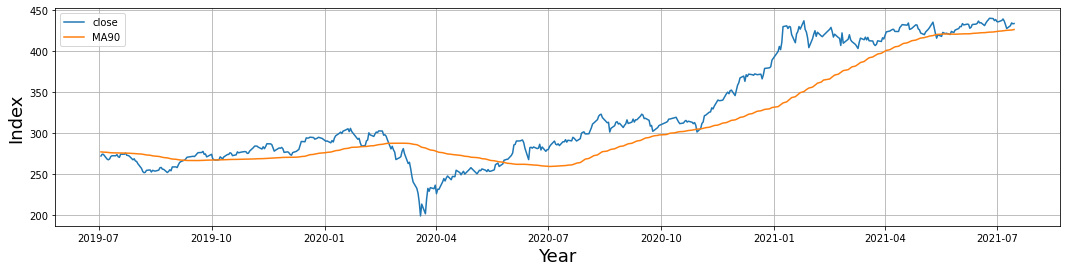

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(kospi['date'], kospi['close'], label='close')
plt.plot(kospi['date'], kospi['90_MAVG'], label='MA90')

plt.legend(loc='best')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Index', fontsize=18)
plt.grid()
plt.show()

# Backtest

In [ ]:
def backtest(beginning_cash=100000): # 최초 금액은 $100,000로 시작합니다.
    asset = [] # 최종적으로 반환할 월별 자산 데이터가 담길 리스트를 선언합니다.
    kospi_shares = 0 # 첫 시점에서 KODEX 주식수는 0주입니다.

    for i in tqdm(range(len(kospi)-1)): # 월별 데이터의 개수만큼 반복하면서,
        # 이전 시점 코스피 이평선 대비 현 시점 코스피 이평선이 상승했을 경우,
        if kospi.iloc[i-1]['90_MAVG'] < kospi.iloc[i]['90_MAVG']: 
            kospi_shares = beginning_cash / kospi.iloc[i]['close'] # 해당 시점 종가로 매수가능한 코스피 주식수를 계산합니다.
            total = kospi_shares * kospi.iloc[i+1]['close'] # 다음 시점 종가와 주식수를 곱해 기말 자산액을 구합니다.

            asset.append(total) # 총 자산가치를 asset 리스트에 담습니다.
            beginning_cash = total # i+1번째 회차의 총 자산가치가 곧 i+2번째 회차의 초기자산이 되기 때문에 재설정 해둡니다.
        
        # 이전 시점 코스피 이평선 대비 현 시점 코스피 이평선이 하락했을 경우,
        elif kospi.iloc[i-1]['90_MAVG'] > kospi.iloc[i]['90_MAVG']:
            kospi_shares = 0 # 코스피 주식은 전량매도하여 주식수 0으로 설정합니다.
            total = beginning_cash

            asset.append(total)
            beginning_cash = total
    
    # asset 리스트 가장 처음에 비어있는 $100,000를 해당 위치에 담아둡니다.
    asset.insert(0, 100000.0)
    # 최종적으로 asset을 반환합니다.
    return asset

In [ ]:
result = backtest()

100%|██████████| 504/504 [00:00<00:00, 603.82it/s] 


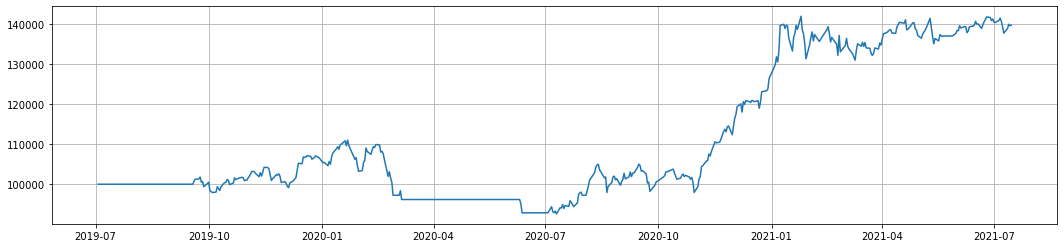

In [ ]:
# 백테스트 결과를 그래프로 나타냅니다.

plt.figure(figsize=(18, 4))
plt.plot(kospi['date'], result)
# plt.plot(kospi['date'], kospi['close']*50, label='close')
# plt.plot(kospi['date'], kospi['90_MAVG']*50, label='MA90')

# plt.legend(loc='best')
# plt.xlabel('Year', fontsize=18)
# plt.ylabel('Index', fontsize=18)
plt.grid()
plt.show()

백테스트 결과와 코스피 지수를 DataFrame으로 변환합니다.

In [ ]:
adj_kospi = kospi['close'] / kospi.iloc[0].close * 100000

back_test = {
    'date' : kospi['date'],
    'backtest' : result,
    'kospi' : adj_kospi
}

back_test = pd.DataFrame(back_test, columns = ['date', 'backtest', 'kospi'])
back_test.head()

,date,backtest,kospi
1093,2019-07-02,100000.0,100000.000000
1089,2019-07-03,100000.0,98695.510382
1088,2019-07-04,100000.0,99481.827735
1087,2019-07-05,100000.0,99412.979672
1082,2019-07-08,100000.0,97311.301953


# Visualization

결과 DataFrame을 그래프로 시각화합니다.

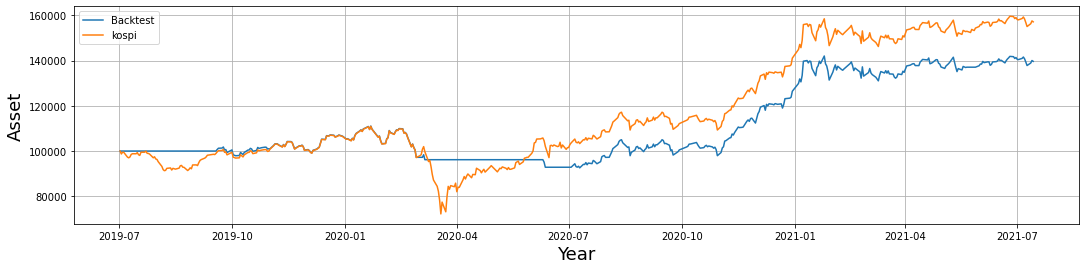

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(back_test['date'], back_test['backtest'], label='Backtest')
plt.plot(back_test['date'], back_test['kospi'], label='kospi')

plt.xlabel('Year', fontsize=18)
plt.ylabel('Asset', fontsize=18)
plt.legend(loc='best')
plt.grid()
plt.show()

# Compute CAGR

백테스트 결과값과 코스피의 연간복리수익률을 계산합니다.

### backtest

In [ ]:
begin, end = result[0], result[-1]

cagr = ((end / begin)**(1/len(set(kospi['date'].dt.year))) - 1) * 100
print('%.2f'%cagr, '%')

11.77 %


### kospi

In [ ]:
begin, end = kospi.iloc[0].close, kospi.iloc[-1].close

kospi_cagr = ((end / begin)**(1/len(set(kospi['date'].dt.year))) - 1) * 100
print('%.2f'%kospi_cagr, '%')

16.25 %


# Compute Statistics

```numpy``` 모듈을 사용해 통계치를 계산합니다.

In [ ]:
# standard deviation of portfolio in percentage
(np.std(back_test) / np.mean(back_test)) * 100

backtest    15.035277
kospi       20.356380
dtype: float64

```diff```를 사용해 매월 자산액의 차이를 계산한 후 전월대비 수익률을 계산합니다.

In [ ]:
back_test['Diff'] = back_test["backtest"].diff()
back_test.head()

,date,backtest,kospi,Diff
1093,2019-07-02,100000.0,100000.000000,NaN
1089,2019-07-03,100000.0,98695.510382,0.0
1088,2019-07-04,100000.0,99481.827735,0.0
1087,2019-07-05,100000.0,99412.979672,0.0
1082,2019-07-08,100000.0,97311.301953,0.0


In [ ]:
back_test['KOSPI_Diff'] = back_test["kospi"].diff()
back_test.head()

,date,backtest,kospi,Diff,KOSPI_Diff
1093,2019-07-02,100000.0,100000.000000,NaN,NaN
1089,2019-07-03,100000.0,98695.510382,0.0,-1304.489618
1088,2019-07-04,100000.0,99481.827735,0.0,786.317353
1087,2019-07-05,100000.0,99412.979672,0.0,-68.848063
1082,2019-07-08,100000.0,97311.301953,0.0,-2101.677719


In [ ]:
ror_list = []
for i in range(len(back_test)):
    ror_list.append(back_test['Diff'].iloc[i] / back_test['backtest'].iloc[i-1])
    
back_test["RoR"] = ror_list

In [ ]:
ror_list = []
for i in range(len(back_test)):
    ror_list.append(back_test['KOSPI_Diff'].iloc[i] / back_test['kospi'].iloc[i-1])
    
back_test['KOSPI_RoR'] = ror_list

In [ ]:
back_test['RoR'].iloc[0] = 0
back_test['RoR'].iloc[1] = 0
back_test['KOSPI_RoR'].iloc[0] = 0
back_test['KOSPI_RoR'].iloc[1] = 0

/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
back_test.head()

,date,backtest,kospi,Diff,KOSPI_Diff,RoR,KOSPI_RoR
1093,2019-07-02,100000.0,100000.000000,NaN,NaN,0.0,0.000000
1089,2019-07-03,100000.0,98695.510382,0.0,-1304.489618,0.0,0.000000
1088,2019-07-04,100000.0,99481.827735,0.0,786.317353,0.0,0.007967
1087,2019-07-05,100000.0,99412.979672,0.0,-68.848063,0.0,-0.000692
1082,2019-07-08,100000.0,97311.301953,0.0,-2101.677719,0.0,-0.021141


In [ ]:
# for i in tqdm(range(len(back_test)-1)):
#     back_test["RoR"] = (back_test["backtest"].diff() / back_test.iloc[i]['backtest'])*100
#     back_test['KOSPI_RoR'] = (back_test['kospi'].diff() / back_test.iloc[i]['kospi'])*100
# back_test.fillna(0, inplace=True)
# back_test.head()

수익률의 표준편차를 계산합니다.

In [ ]:
# absolute standard deviation
np.std(back_test) # n for all
back_test.std() # n-1 for sample

backtest      16724.519865
kospi         23945.665714
Diff           1164.009255
KOSPI_Diff     1582.608798
RoR               0.009919
KOSPI_RoR         0.014738
dtype: float64

In [ ]:
# relative standard deviation
(np.std(back_test) / np.mean(back_test)) * 100 # n for all
(back_test.std()/back_test.mean()) * 100 # n-1 for sample

backtest        15.050185
kospi           20.376565
Diff          1479.907621
KOSPI_Diff    1396.721353
RoR           1395.922058
KOSPI_RoR     1431.928981
dtype: float64

수익률의 표준편차가 최대치가 되는 시점을 찾습니다.

In [ ]:
np.datetime_as_string(back_test[back_test['RoR'] == max(back_test['RoR'])].date.values[0], unit='D'), max(back_test['RoR'])

('2021-01-08', 0.04724811956865697)

수익률의 표준편차가 최소치가 되는 시점을 찾습니다.

In [ ]:
np.datetime_as_string(back_test[back_test['RoR'] == min(back_test['RoR'])].date.values[0], unit='D'), min(back_test['RoR'])

('2020-02-24', -0.038985021544354195)

백테스트 수익률 분포를 히스토그램으로 나타냅니다.

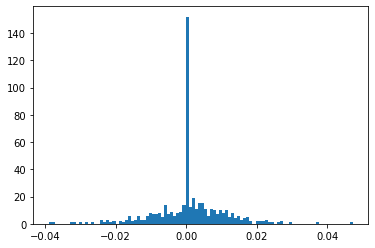

In [ ]:
plt.hist(back_test['RoR'], bins=100)
plt.show()

KOSPI 수익률 분포를 히스토그램으로 나타냅니다.

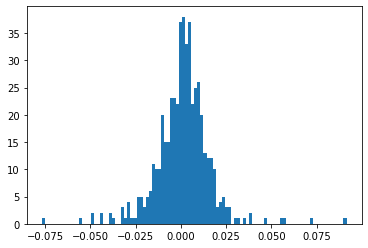

In [ ]:
plt.hist(back_test['KOSPI_RoR'], bins=100)
plt.show()